In [301]:
from sklearn.datasets import load_digits
digit=load_digits()
digit.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [353]:
from sklearn.preprocessing import StandardScaler
x_scale=StandardScaler()
x=x_scale.fit_transform(digit.data)

In [362]:
from sklearn.model_selection import train_test_split
y=digit.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [363]:
import numpy as np
def conv(y):
    y_out=np.zeros((len(y),10))
    for i in range(len(y)):
        y_out[i,y[i]]=1
    return y_out

In [364]:
y_out_train=conv(y_train)
y_train[0],y_out_train[0]

(9, array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]))

In [365]:
n_struct=[64,30,10]

In [366]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def deriv(z):
    return sigmoid(z)*(1-sigmoid(z))

In [367]:
import numpy.random as rn
def init_w_b(n_struct):
    w={}
    b={}
    for l in range(1,len(n_struct)):
        w[l]=rn.random_sample((n_struct[l],n_struct[l-1]))
        b[l]=rn.random_sample((n_struct[l],))
    return w,b

In [368]:
def init_dw_db(n_struct):
    del_w={}
    del_b={}
    for l in range(1,len(n_struct)):
        del_w[l]=np.zeros((n_struct[l],n_struct[l-1]))
        del_b[l]=np.zeros((n_struct[l],))
    return del_w,del_b

In [369]:
def feed_forward(x,w,b):
    h={1:x}
    z={}
    for l in range(1,len(w)+1):
        if l==1:
            node=x
        else:
            node=h[l]
        z[l+1]=w[l].dot(node)+b[l]
        h[l+1]=sigmoid(z[l+1])
    return h,z

In [370]:
def outer_del(y,h_out,z_out):
    return -(y-h_out)*deriv(z_out)

def hid_del(del_1,w_l,z_l):
    return np.dot(np.transpose(w_l),del_1)*deriv(z_l)

In [371]:
def train_nn(n_struct,x,y):
    w,b=init_w_b(n_struct)
    iter_n=50000
    a=0.25
    m=len(y)
    avg_cost_func=[]
    while iter_n>0:
        avg_cost=0
        del_w,del_b=init_dw_db(n_struct)
        for i in range(m):
            delta={}
            h,z=feed_forward(x[i,:],w,b)
            for l in range(len(n_struct),0,-1):
                if l==len(n_struct):
                    delta[l]=outer_del(y[i,:],h[l],z[l])
                    avg_cost=np.linalg.norm(y[i,:]-h[l])
                else:
                    if l>1:
                        delta[l]=hid_del(delta[l+1],w[l],z[l])
                    del_w[l]+=np.dot(delta[l+1][:,np.newaxis],np.transpose(h[l][:,np.newaxis]))
                    del_b[l]+=delta[l+1]
            for l in range(len(n_struct)-1,0,-1):
                w[l]+=-a*(1.0/m*del_w[l])
                b[l]+=-a*(1.0/m*del_b[l])
            avg_cost = 1.0/m*avg_cost
            avg_cost_func.append(avg_cost)
            iter_n-=1
    return w,b,avg_cost_func

In [372]:
w,b,avg_cost_func=train_nn(n_struct,x_train,y_out_train)

Text(0.5,0,'Iterations')

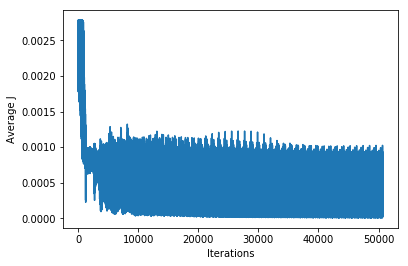

In [373]:
import matplotlib.pyplot as plt
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iterations')

In [374]:
def predict(w,b,x,layer):
    m=x.shape[0]
    y=np.zeros((m,))
    for i in range(m):
        h,z=feed_forward(x[i,:],w,b)
        y[i]=np.argmax(h[layer])
    return y

In [375]:
from sklearn.metrics import accuracy_score
y_pred=predict(w,b,x_test,3)
accuracy_score(y_test,y_pred)*100

66.898470097357446